In [ ]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 35.8 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 133 kB 72.9 MB/s 
     |████████████████████████████████| 108 kB 84.3 MB/s 
     |████████████████████████████████| 226 kB 87.3 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 192 kB 79.8 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 564 kB 83.0 MB/s 
     |████████████████████████████████| 57 kB 6.8 MB/s 
     |████████████████████████████████| 132 kB 81.9 MB/s 
     |████████████████████████████████| 37.8 MB 1.2 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 202 kB 84.6 MB/s 
     |████████████████████████████████| 

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
import torch
import torchvision
from fiftyone.core.dataset import Dataset
from PIL import Image
from torchvision.transforms import functional as func
from fiftyone import ViewField as F

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


# Loading Coco dataset 2017, validation split

In [ ]:
dataset = foz.load_zoo_dataset("coco-2017", split="validation")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [20.6s elapsed, 0s remaining, 105.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [20.6s elapsed, 0s remaining, 105.2Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [1.4m elapsed, 0s remaining, 72.1Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [1.4m elapsed, 0s remaining, 72.1Mb/s]      


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [28.4s elapsed, 0s remaining, 169.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [28.4s elapsed, 0s remaining, 169.7 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


# Launching fiftyone app

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


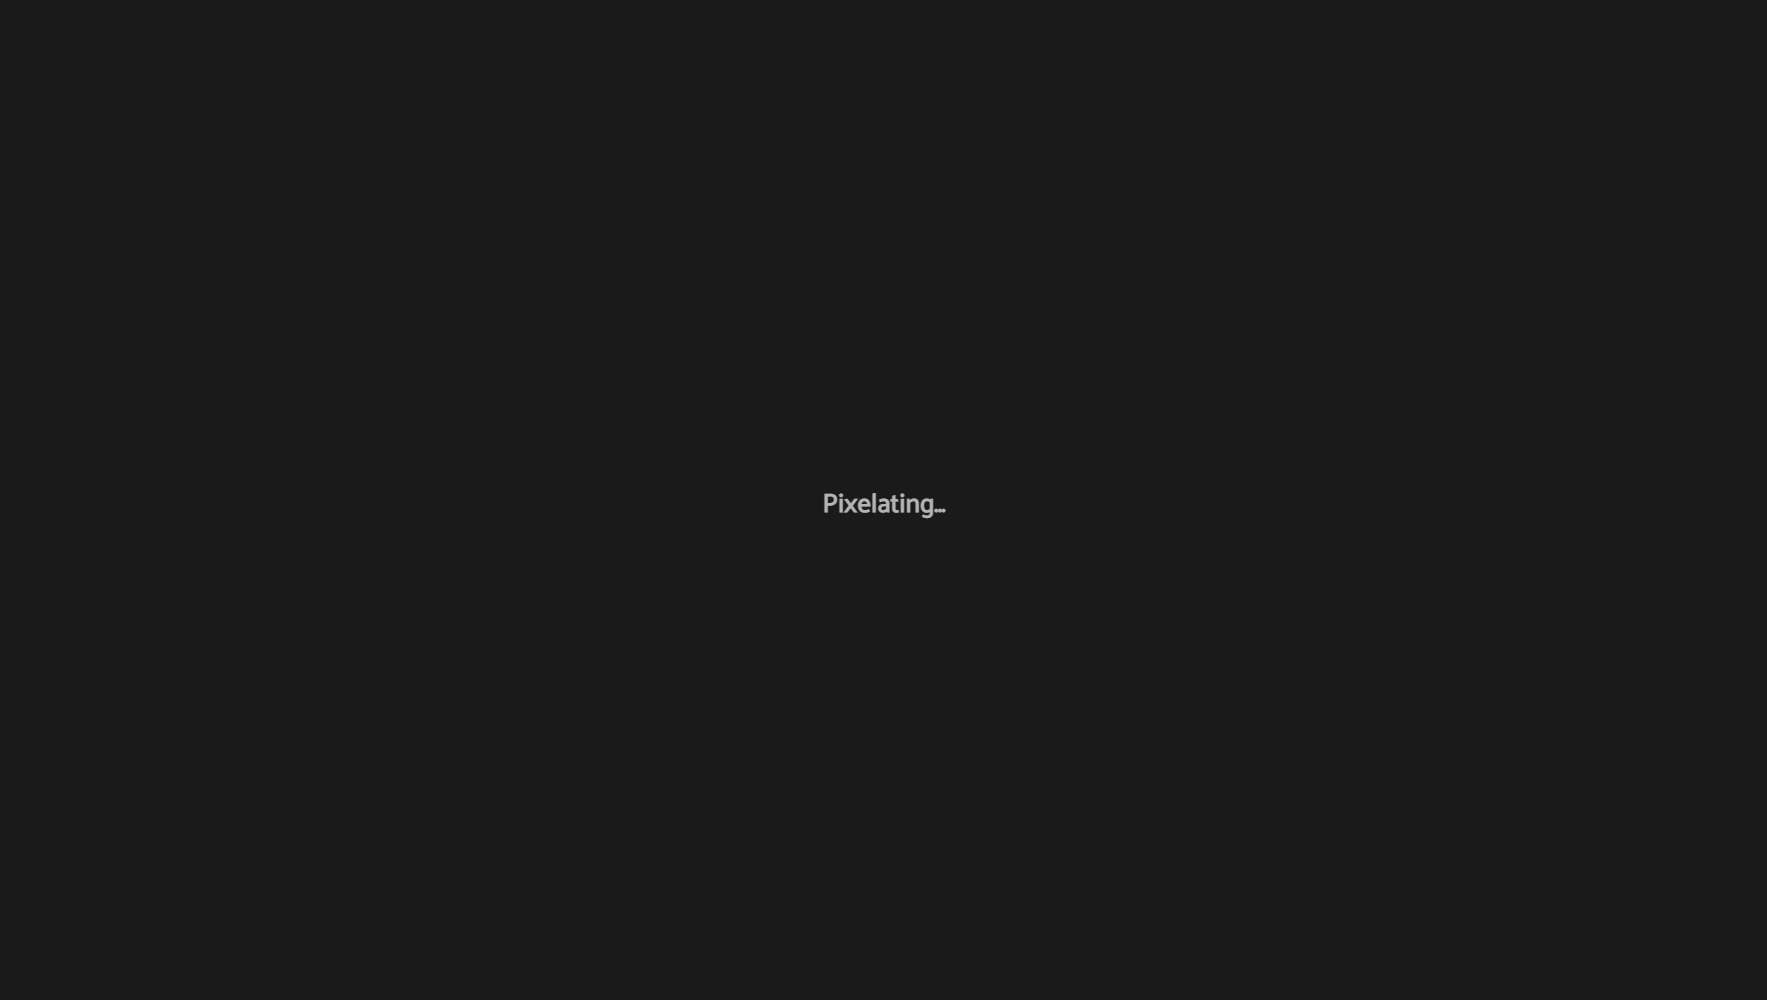

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Information about the dataset

In [ ]:
print(dataset)

Name:        coco-2017-validation
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
sample = dataset.first()
print(sample.ground_truth.detections[0])

<Detection: {
    'id': '63a4c6010df913afd212283c',
    'attributes': {},
    'tags': [],
    'label': 'potted plant',
    'bounding_box': [
        0.37028125,
        0.3345305164319249,
        0.038593749999999996,
        0.16314553990610328,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'furniture',
    'iscrowd': 0,
}>


# Model 3

# SSDLite_Mobilenet

In [ ]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

print("Model ready")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth


  0%|          | 0.00/13.4M [00:00<?, ?B/s]

Model ready


In [ ]:
predictions_view = dataset.take(2500, seed=51)

In [ ]:
# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["ssd"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 2500/2500 [14.5m elapsed, 0s remaining, 2.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2500/2500 [14.5m elapsed, 0s remaining, 2.8 samples/s]      


Finished adding predictions


In [ ]:
results = predictions_view.evaluate_detections(
    "ssd",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 2500/2500 [3.9h elapsed, 0s remaining, 0.2 samples/s]    


INFO:eta.core.utils: 100% |███████████████| 2500/2500 [3.9h elapsed, 0s remaining, 0.2 samples/s]    


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 2500/2500 [13.5m elapsed, 0s remaining, 3.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2500/2500 [13.5m elapsed, 0s remaining, 3.5 samples/s]      


# IoU visible on images

In [ ]:
eval_patches = predictions_view.to_evaluation_patches("eval")
print(eval_patches)

print(eval_patches.count_values("type"))

session.view = eval_patches

Dataset:     coco-2017-validation
Media type:  image
Num patches: 742418
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ssd:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. Take(size=2500, seed=51)
    2. ToEvaluationPatches(eval_key='eval', config=None)
{'fn': 7849, 'fp': 723966, 'tp': 10603}


In [ ]:
session.freeze()  # screenshot the active App for sharing

# mAP of this model

In [ ]:
print(results.mAP())

0.21451017794591154


# Getting the 10 most common classes

In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset.count_values("ground_truth.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

               precision    recall  f1-score   support

       person       0.07      0.88      0.12     13902
          car       0.03      0.63      0.06      1438
        chair       0.02      0.67      0.03      1214
         book       0.07      0.86      0.14      2513
       bottle       0.02      0.50      0.04       650
          cup       0.03      0.50      0.06       593
 dining table       0.01      0.77      0.03       329
traffic light       0.01      0.48      0.01       429
         bowl       0.02      0.47      0.05       312
      handbag       0.01      0.29      0.01       255

    micro avg       0.04      0.80      0.08     21635
    macro avg       0.03      0.61      0.05     21635
 weighted avg       0.06      0.80      0.11     21635



# Precision vs. recall of th 10 most common classes

In [ ]:
plot = results.plot_pr_curves(classes=classes_top10)
plot.show()

# Confusion matrix for the 10 most common classes

In [ ]:
plot = results.plot_confusion_matrix(classes=classes_top10)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Printing a classification report for all 80 classes

In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
classes_80 = sorted(counts, key=counts.get, reverse=True)[:80]

results.print_report(classes=classes_80)

                precision    recall  f1-score   support

        person       0.07      0.88      0.12     13902
           car       0.03      0.63      0.06      1438
         chair       0.02      0.67      0.03      1214
          book       0.07      0.86      0.14      2513
        bottle       0.02      0.50      0.04       650
           cup       0.03      0.50      0.06       593
  dining table       0.01      0.77      0.03       329
 traffic light       0.01      0.48      0.01       429
          bowl       0.02      0.47      0.05       312
       handbag       0.01      0.29      0.01       255
          bird       0.01      0.77      0.02       439
          boat       0.03      0.68      0.05       295
         truck       0.03      0.54      0.06       212
         bench       0.00      0.37      0.01       225
      umbrella       0.04      0.72      0.07       389
           cow       0.07      0.82      0.13       451
        banana       0.07      0.81      0.12  

# Confusion matrix for all the 80 classes

In [ ]:
plot = results.plot_confusion_matrix(classes=classes_80)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Success cases

In [ ]:
# Only contains detections with confidence >= 0.75
success_view = predictions_view.filter_labels("ssd", F("confidence") > 0.75, only_matches=False)

In [ ]:
# Print some information about the view
print(success_view)

Dataset:     coco-2017-validation
Media type:  image
Num samples: 2500
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ssd:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=2500, seed=51)
    2. FilterLabels(field='ssd', filter={'$gt': ['$$this.confidence', 0.75]}, only_matches=False, trajectories=False)


In [ ]:
session.view = success_view

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Failure cases

In [ ]:
# Only contains detections with confidence <= 0.3
failure_view = predictions_view.filter_labels("ssd", F("confidence") <= 0.3, only_matches=False)

In [ ]:
# Print some information about the view
print(failure_view)

Dataset:     coco-2017-validation
Media type:  image
Num samples: 2500
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ssd:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=2500, seed=51)
    2. FilterLabels(field='ssd', filter={'$lte': ['$$this.confidence', 0.3]}, only_matches=False, trajectories=False)


In [ ]:
session.view = failure_view

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Working with another dataset to test generalisation

# Loading VOC 2012 dataset, validation split

In [ ]:
dataset_voc2012 = foz.load_zoo_dataset("voc-2012", split="validation")

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.1m elapsed, 0s remaining, 87.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.1m elapsed, 0s remaining, 87.7 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [15.3s elapsed, 0s remaining, 311.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [15.3s elapsed, 0s remaining, 311.7 samples/s]      


Dataset 'voc-2012-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-2012-validation' created


In [ ]:
# Choose a random subset of 100 samples to add predictions to
predictions_view_voc2012 = dataset_voc2012.take(1000, seed=51)

In [ ]:
# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view_voc2012):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["ssd"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████| 1000/1000 [3.5m elapsed, 0s remaining, 4.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [3.5m elapsed, 0s remaining, 4.7 samples/s]      


Finished adding predictions


In [ ]:
results_voc2012 = predictions_view_voc2012.evaluate_detections(
    "ssd",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 1000/1000 [1.4h elapsed, 0s remaining, 0.2 samples/s]     


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [1.4h elapsed, 0s remaining, 0.2 samples/s]     


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 1000/1000 [5.1m elapsed, 0s remaining, 3.7 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [5.1m elapsed, 0s remaining, 3.7 samples/s]       


# IoU visible on images

In [ ]:
eval_patches = predictions_view_voc2012.to_evaluation_patches("eval")
print(eval_patches)

print(eval_patches.count_values("type"))

session.view = eval_patches

Dataset:     voc-2012-validation
Media type:  image
Num patches: 300654
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ssd:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. Take(size=1000, seed=51)
    2. ToEvaluationPatches(eval_key='eval', config=None)
{'fp': 298037, 'fn': 654, 'tp': 1963}


In [ ]:
session.freeze()  # screenshot the active App for sharing

# mAP of this model on VOC 2012

In [ ]:
print(results_voc2012.mAP())

0.3177410338420653


# Getting the 5 most common classes 

In [ ]:
# Get the 5 most common classes in the dataset
counts = dataset_voc2012.count_values("ground_truth.detections.label")
classes_top5 = sorted(counts, key=counts.get, reverse=True)[:5]

# Print a classification report for the top-10 classes
results_voc2012.print_report(classes=classes_top5)

              precision    recall  f1-score   support

      person       0.01      0.89      0.02       921
       chair       0.01      0.85      0.02       209
         car       0.01      0.81      0.03       237
         dog       0.03      0.96      0.06       139
      bottle       0.01      0.61      0.02        80

   micro avg       0.01      0.86      0.02      1586
   macro avg       0.01      0.82      0.03      1586
weighted avg       0.01      0.86      0.02      1586



# Precision vs. recall of th 5 most common classes

In [ ]:
plot = results_voc2012.plot_pr_curves(classes=classes_top5)
plot.show()

# Confusion matrix for the 5 most common classes

In [ ]:
plot = results_voc2012.plot_confusion_matrix(classes=classes_top5)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Printing a classification report for all 20 classes

In [ ]:
counts = dataset_voc2012.count_values("ground_truth.detections.label")
classes_20 = sorted(counts, key=counts.get, reverse=True)[:20]

results_voc2012.print_report(classes=classes_20)

              precision    recall  f1-score   support

      person       0.01      0.89      0.02       921
       chair       0.01      0.85      0.02       209
         car       0.01      0.81      0.03       237
         dog       0.03      0.96      0.06       139
      bottle       0.01      0.61      0.02        80
        bird       0.00      0.91      0.01        91
         cat       0.02      0.97      0.04       114
 pottedplant       0.00      0.00      0.00        69
        boat       0.01      0.84      0.02        77
       sheep       0.01      0.89      0.03        73
   aeroplane       0.00      0.00      0.00        80
   tvmonitor       0.00      0.00      0.00        59
        sofa       0.00      0.00      0.00        49
     bicycle       0.02      0.98      0.03        54
   motorbike       0.00      0.00      0.00        65
 diningtable       0.00      0.00      0.00        61
       horse       0.02      0.90      0.04        69
         cow       0.02    

# Confusion matrix for all the 20 classes

In [ ]:
plot = results_voc2012.plot_confusion_matrix(classes=classes_20)
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



# Success cases

In [ ]:
# Only contains detections with confidence >= 0.75
success_view_voc2012 = predictions_view_voc2012.filter_labels("ssd", F("confidence") > 0.75, only_matches=False)

In [ ]:
# Print some information about the view
print(success_view_voc2012)

In [ ]:
session.view = success_view_voc2012

In [ ]:
session.freeze()  # screenshot the active App for sharing

# Failure cases

In [ ]:
# Only contains detections with confidence <= 0.3
failure_view_voc2012 = predictions_view_voc2012.filter_labels("ssd", F("confidence") <= 0.3, only_matches=False)

In [ ]:
# Print some information about the view
print(failure_view_voc2012)

In [ ]:
session.view = failure_view_voc2012

In [ ]:
session.freeze()  # screenshot the active App for sharing